In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:
url='https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


Text(0, 0.5, 'Count')

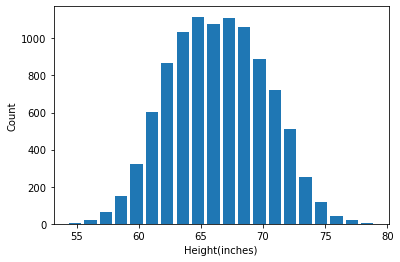

In [10]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

In [11]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [12]:
df.shape

(10000, 2)

In [16]:
import seaborn as sns

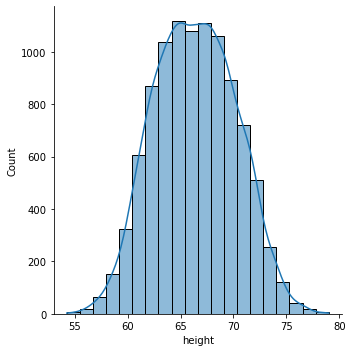

In [22]:
sns.displot(data=df,x='height',kde=True,bins=20)

In [23]:
df['height'].mean()

66.3675597548656

In [24]:
df['height'].std()

3.847528120795573

In [25]:
## 3 standard deviation

In [26]:
upper_limit=df['height'].mean()+3*df['height'].std()

In [28]:
lower_limit=df['height'].mean()-3*df['height'].std()

In [30]:
df[(df['height']>upper_limit)|(df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [32]:
df2=df[(df['height']>lower_limit)&(df['height']<upper_limit)]
df2.shape

(9993, 2)

In [34]:
# 7 rows are removed using 3 std 
df.shape[0]-df2.shape[0]

7

In [35]:
## z score = (x-mean)/std

In [37]:
df['z-score']=(df['height']-df['height'].mean())/df['height'].std()

In [40]:
df.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [43]:
df[(df['z-score']>-3)&(df['z-score']<3)].shape

(9993, 3)